In [1]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)
print(X_train.shape)
print(X_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
input_img = Input(shape=(32,32,3))

#Encoder
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)  
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())     # 32x32x32
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32
model.add(BatchNormalization())     # 16x16x32
model.add(UpSampling2D())
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model.add(BatchNormalization())
model.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 up_sampling2d_3 (UpSampling  (None, 32, 32, 32)       0

In [5]:
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584 

In [6]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584 

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
196/196 [==============================] - 102s 508ms/step - loss: 0.0069 - accuracy: 0.6807 - val_loss: 0.0242 - val_accuracy: 0.6153
Epoch 2/50
196/196 [==============================] - 115s 585ms/step - loss: 0.0018 - accuracy: 0.7760 - val_loss: 0.0049 - val_accuracy: 0.7155
Epoch 3/50
196/196 [==============================] - 104s 530ms/step - loss: 0.0012 - accuracy: 0.8047 - val_loss: 0.0017 - val_accuracy: 0.7082
Epoch 4/50
196/196 [==============================] - 107s 546ms/step - loss: 9.2263e-04 - accuracy: 0.8214 - val_loss: 0.0011 - val_accuracy: 0.7715
Epoch 5/50
196/196 [==============================] - 104s 531ms/step - loss: 7.7500e-04 - accuracy: 0.8315 - val_loss: 8.5781e-04 - val_accuracy: 0.7746
Epoch 6/50
196/196 [==============================] - 110s 560ms/step - loss: 6.7858e-04 - accuracy: 0.8408 - val_loss: 6.5022e-04 - val_accuracy: 0.7943
Epoch 7/50
196/196 [==============================] - 96s 491ms/step - loss: 6.0471e-04 - accuracy: 0.84

In [9]:
#encoded_imgs = model.predict(X_test)
predicted = model.predict(X_test)

313/313 [==============================] - 7s 19ms/step


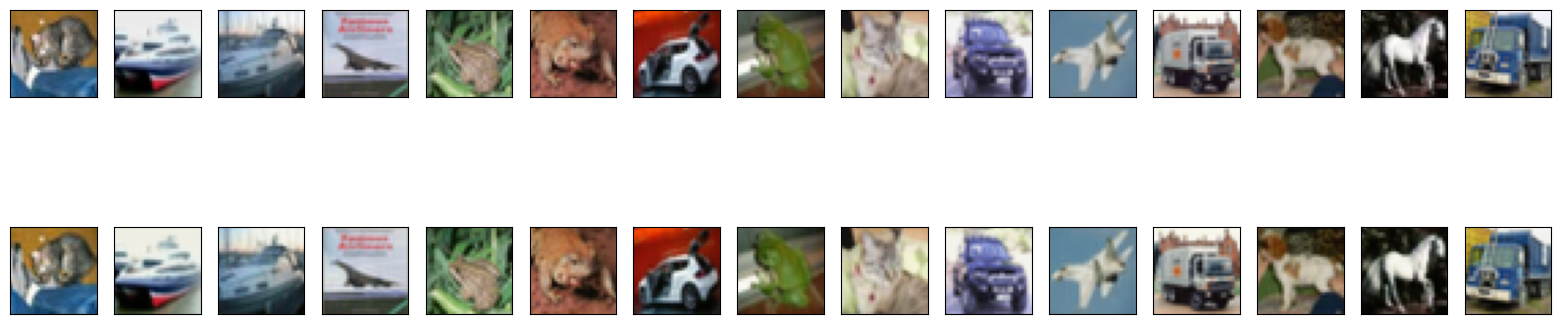

In [22]:
plt.figure(figsize=(40,4))
for i in range(15):
    # display original images
    ax = plt.subplot(3, 30, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

    
    # display reconstructed images
    ax = plt.subplot(3, 30, 2*30 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

In [23]:
#Encoder
x = Conv2D(64,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(16,(3,3), activation='relu', padding='same')(x)
encoded1 = MaxPooling2D((2,2), padding='same', name='encoder')(x)

#Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)  
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded1 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


In [24]:
autoencoder1 = Model(input_img, decoded1)
autoencoder1.compile(optimizer='adam', loss='mse')

In [29]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())     # 32x32x32
model1.add(Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))      # 16x16x32
model1.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 16x16x32
model1.add(BatchNormalization())     # 16x16x32
model1.add(UpSampling2D())
model1.add(Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))      # 32x32x32
model1.add(BatchNormalization())
model1.add(Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))   # 32x32x3

model1.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 up_sampling2d_7 (UpSampling  (None, 32, 32, 32)      

In [25]:
autoencoder1=Model(input_img, decoded1)
autoencoder1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584 

In [26]:
encoder1 = Model(input_img, encoded1)
encoder1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 16)          4624

In [27]:
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model1.fit(X_train, X_train,
                epochs=50,
                batch_size=256, 
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
196/196 [==============================] - 134s 665ms/step - loss: 0.0069 - accuracy: 0.6675 - val_loss: 0.0278 - val_accuracy: 0.5572
Epoch 2/50
196/196 [==============================] - 129s 659ms/step - loss: 0.0018 - accuracy: 0.7747 - val_loss: 0.0069 - val_accuracy: 0.6942
Epoch 3/50
196/196 [==============================] - 130s 662ms/step - loss: 0.0012 - accuracy: 0.8060 - val_loss: 0.0014 - val_accuracy: 0.7446
Epoch 4/50
196/196 [==============================] - 137s 696ms/step - loss: 9.3156e-04 - accuracy: 0.8237 - val_loss: 8.1266e-04 - val_accuracy: 0.8144
Epoch 5/50
196/196 [==============================] - 135s 686ms/step - loss: 7.5869e-04 - accuracy: 0.8364 - val_loss: 8.8057e-04 - val_accuracy: 0.8356
Epoch 6/50
196/196 [==============================] - 135s 688ms/step - loss: 6.5973e-04 - accuracy: 0.8448 - val_loss: 6.3588e-04 - val_accuracy: 0.8553
Epoch 7/50
196/196 [==============================] - 149s 761ms/step - loss: 6.0150e-04 - accuracy: